# Assignment 2
Solving Spam/Ham classification using ML algorithms. The dataset contains one message per line. Each line is composed by two columns: `label` contains the label (ham or spam) and `message` contains the raw text.

# Import necessary Libs

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

%matplotlib inline
plt.style.use("ggplot")
sns.set_style("darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading Data

In [534]:
# read file into pandas using a relative path
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

In [535]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
message,5572,5169,"Sorry, I'll call later",30


In [536]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have `4825` ham message and `747` spam message

Text(0, 0.5, 'Number of Data points')

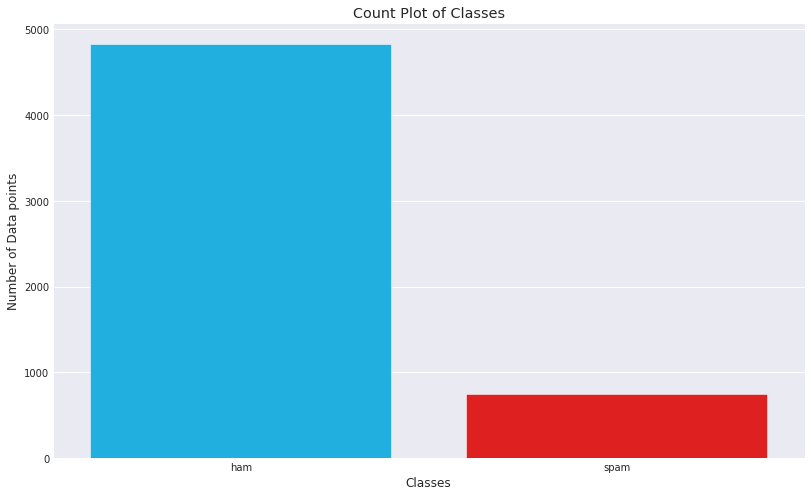

In [537]:
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df["label"],palette=['#00bfff','#FF0000'])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

In [538]:
fig = px.pie(data_frame = df, names = "label", hole = 0.4, title = "Spam and Ham data ratio", 
             width = 1000, height = 500, color_discrete_sequence = px.colors.diverging.Spectral)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [539]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [540]:
df['no_of_characters'] = df.message.apply(len)
df["no_of_words"] = df.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
df["no_of_sentence"] = df.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)
df.head()

,label,message,label_num,no_of_characters,no_of_words,no_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


Text(0.5, 0, 'Message Length')

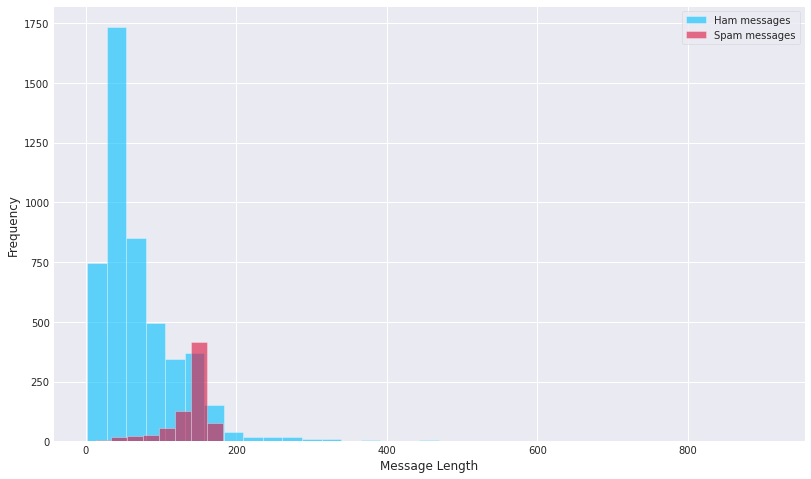

In [541]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].no_of_characters.plot(bins=35, kind='hist', color='deepskyblue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].no_of_characters.plot(kind='hist', color='crimson', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

Through just a basic EDA we've been able to discover a trend that spam messages tend to have more characters.and on the other hand the ham messages have less characters

In [542]:
df[df.label=='spam'].describe()

,label_num,no_of_characters,no_of_words,no_of_sentence
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.017403
std,0.0,29.183082,6.867007,1.528449
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [543]:
df[df.label=='ham'].describe()

,label_num,no_of_characters,no_of_words,no_of_sentence
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.271917,1.808705
std,0.0,58.016023,13.988885,1.328227
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


We have a `ham` message with 910 charachters, let's check this message.

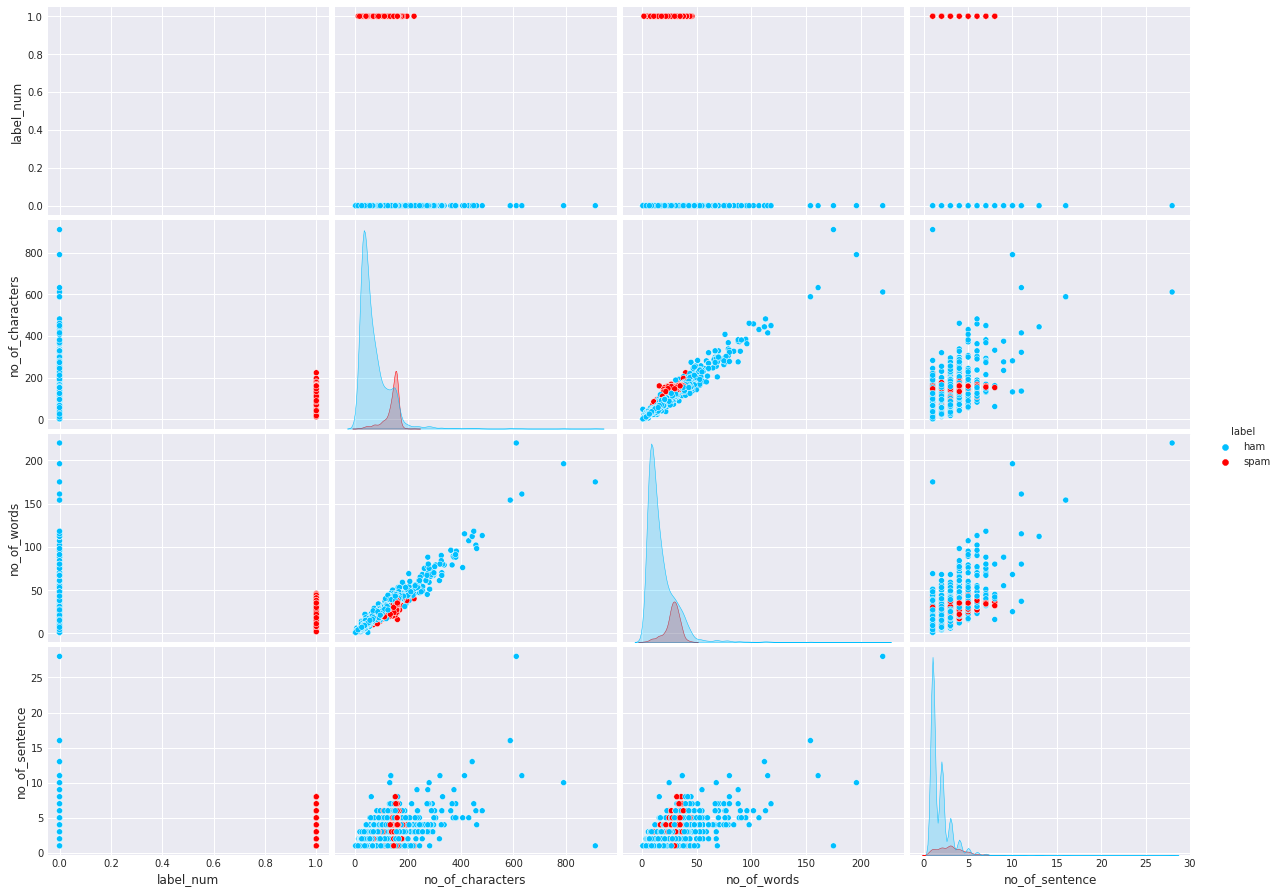

In [544]:
fig = sns.pairplot(data = df, hue = "label", palette = ['#00bfff','#FF0000'], height = 3.15, aspect = 1.35)
plt.show(fig);

In [545]:
df[df.no_of_characters == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Text Pre-processing



In [546]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [547]:
df.head()

,label,message,label_num,no_of_characters,no_of_words,no_of_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [548]:
df['clean_msg'] = df.message.apply(text_process)

In [549]:
df.head()

,label,message,label_num,no_of_characters,no_of_words,no_of_sentence,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,Nah think goes usf lives around though


In [550]:
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [551]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


# Vectorization

In [552]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [553]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


> There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [554]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [555]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

In [556]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [557]:
# examine the document-term matrix
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [558]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 9971 stored elements in Compressed Sparse Row format>

In [559]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

# Building and evaluating models


In [560]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]

models_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

print('Time consumption')
for i in range(len(classifiers)):
  print('\n', models_dict[i])
  %time classifiers[i].fit(X_train_dtm, y_train)


Time consumption

 NaiveBayes
CPU times: user 3.84 ms, sys: 942 µs, total: 4.78 ms
Wall time: 5.93 ms

 RandomForest
CPU times: user 721 ms, sys: 3.48 ms, total: 725 ms
Wall time: 723 ms

 KNeighbours
CPU times: user 546 µs, sys: 862 µs, total: 1.41 ms
Wall time: 1.33 ms

 SVC
CPU times: user 786 ms, sys: 739 µs, total: 787 ms
Wall time: 781 ms


In [561]:
# calculate accuracy of class predictions
from sklearn import metrics
for i, model in enumerate(classifiers):
  y_pred_class = model.predict(X_test_dtm) # make class predictions
  acc_score = metrics.accuracy_score(y_test, y_pred_class)
  print("%s: %f " % (models_dict[i], acc_score.mean()))
  print("Confusion matrix: \n%s\n" % metrics.confusion_matrix(y_test, y_pred_class))

NaiveBayes: 0.982771 
Confusion matrix: 
[[1205    8]
 [  16  164]]

RandomForest: 0.974156 
Confusion matrix: 
[[1212    1]
 [  35  145]]

KNeighbours: 0.918880 
Confusion matrix: 
[[1213    0]
 [ 113   67]]

SVC: 0.981335 
Confusion matrix: 
[[1213    0]
 [  26  154]]



In [562]:
X_test.shape

(1393,)

In [563]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

Series([], Name: clean_msg, dtype: object)

In [564]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

1777    Buy Space Invaders chance win orig Arcade Game...
3528    Xmas New Years Eve tickets sale club day 10am ...
1662    Hi lookin saucy daytime fun wiv busty married ...
1499    SMS ac JSco Energy high may know 2channel 2day...
4247    accordingly repeat text word ok mobile phone send
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
517     credits topped httpwwwbubbletextcom renewal Pi...
2078                         85233 FREERingtoneReply REAL
4071    Loans purpose even Bad Credit Tenants Welcome ...
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPER

In [565]:
# example of false negative 
X_test[4963]

'Dear Voucher holder next meal us Use following link pc enjoy 1 dining experiencehttpwwwvouch4mecometlpdiningasp'

## For Naive Bayes

In [566]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = classifiers[0].predict_proba(X_test_dtm)[:, 1]

print(f"Naive Bayes predicted probabilities: {y_pred_prob}")

Naive Bayes predicted probabilities: [2.11903975e-02 3.97831612e-04 1.06470895e-03 ... 1.31939653e-02
 9.99821127e-05 6.04083365e-06]


In [567]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9774342768159751

In [568]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [569]:
y_pred = pipe.predict(X_test)

In [570]:
metrics.accuracy_score(y_test, y_pred)

0.9669777458722182

In [571]:
metrics.confusion_matrix(y_test, y_pred)

array([[1213,    0],
       [  46,  134]])

# Comparing models on Testset


In [572]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train_dtm)
    pred_test = i.predict(X_test_dtm)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train_dtm,y_train)
    test_accuracy = model.score(X_test_dtm,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [573]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [574]:
Results.style.background_gradient()

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.953488,0.911111,0.931818,0.981335,0.995214
RandomForest,0.993151,0.805556,0.889571,0.981335,0.995214
KNeighbours,1.000000,0.372222,0.542510,0.981335,0.995214
SVC,1.000000,0.855556,0.922156,0.981335,0.995214


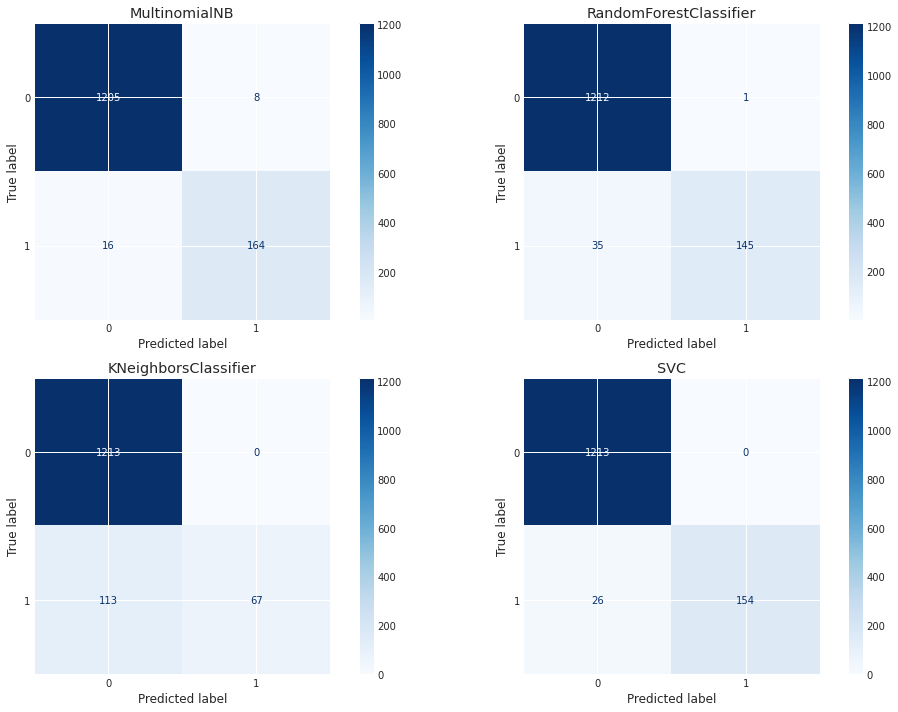

In [575]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
  metrics.ConfusionMatrixDisplay.from_estimator(cls, 
                        X_test_dtm, 
                        y_test, 
                        ax=ax,
                        cmap='Blues'
                        )
  ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

The end
